In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

df_chatgpt = pd.read_csv('results_chatgpt.csv')
df_deepseek = pd.read_csv('results_deepseek.csv')

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

df_chatgpt = pd.read_csv('metrics_chatgpt.csv')
df_deepseek = pd.read_csv('metrics_deepseek.csv')

## Recursos

In [84]:
df_chatgpt['provider'] = 'chatgpt'
df_deepseek['provider'] = 'deepseek'
df_combined = pd.concat([df_chatgpt, df_deepseek])
display(df_combined.head())

,question,provider,em,citation_coverage,latency_avg_sec,latency_p95_sec,estimated_cost_usd
0,¿Cuáles son los principios fundamentales que i...,chatgpt,0,0.0,4.489,4.489,0.10752
1,¿Qué tipos de conductas aborda el reglamento d...,chatgpt,0,0.0,5.198,5.198,0.14304
2,¿Qué derechos tienen las personas denunciantes...,chatgpt,0,0.0,7.529,7.529,0.13986
3,¿Cómo se coordina la Universidad con unidades ...,chatgpt,0,0.0,7.952,7.952,0.12444
4,¿Qué significa otorgar un trato digno y equita...,chatgpt,0,0.0,2.785,2.785,0.11667


## Analisis de datos

### Subtarea:
Calcular y comparar métricas relevantes de los datos combinados, como puntuaciones promedio, rendimiento en tareas específicas, etc.


Examinar las columnas disponibles en `df_combined` para identificar posibles indicadores de rendimiento, como la longitud de la respuesta o la presencia de referencias.

In [85]:
print(df_combined.columns)

Index(['question', 'provider', 'em', 'citation_coverage', 'latency_avg_sec',
       'latency_p95_sec', 'estimated_cost_usd'],
      dtype='object')



Basado en las columnas disponibles ('question', 'provider', 'em', 'citation_coverage', 'latency_avg_sec',
       'latency_p95_sec', 'estimated_cost_usd'), calcular las métricas agrupadas por 'provider'.

In [86]:
metrics = df_combined.groupby('provider').agg(
    average_latency_avg_sec=('latency_avg_sec', 'mean'),
    average_latency_p95_sec=('latency_p95_sec', 'mean'),
    average_estimated_cost_usd=('estimated_cost_usd', 'mean'),
    average_em=('em', 'mean'),
    average_citation_coverage=('citation_coverage', 'mean')
)

display(metrics)

,average_latency_avg_sec,average_latency_p95_sec,average_estimated_cost_usd,average_em,average_citation_coverage
provider,,,,,
chatgpt,5.1272,5.1272,0.118128,0.0,0.0
deepseek,10.6874,10.6874,0.106102,0.0,0.0


## Visualizar datos


Crear visualizaciones (por ejemplo, gráficos de barras, gráficos de líneas) para mostrar la comparación de las métricas entre los dos modelos.


Restablecer el índice del DataFrame de métricas y luego crear gráficos de barras para visualizar la latencia, el costo, la coincidencia exacta y la cobertura de citas para cada proveedor.

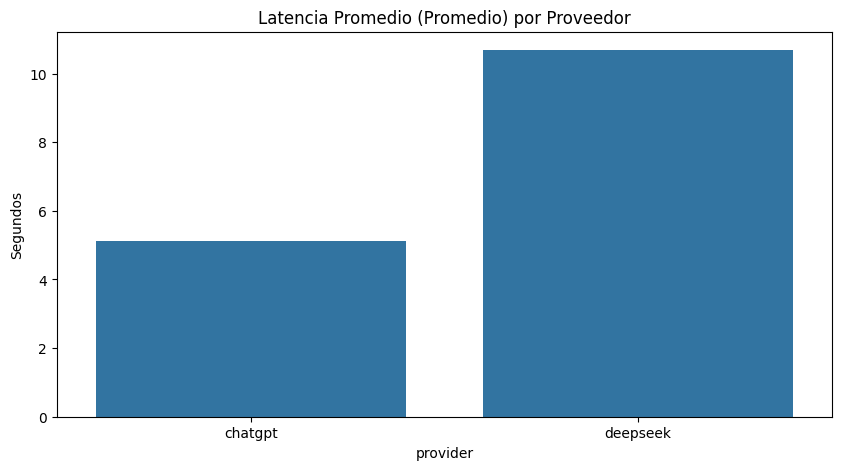

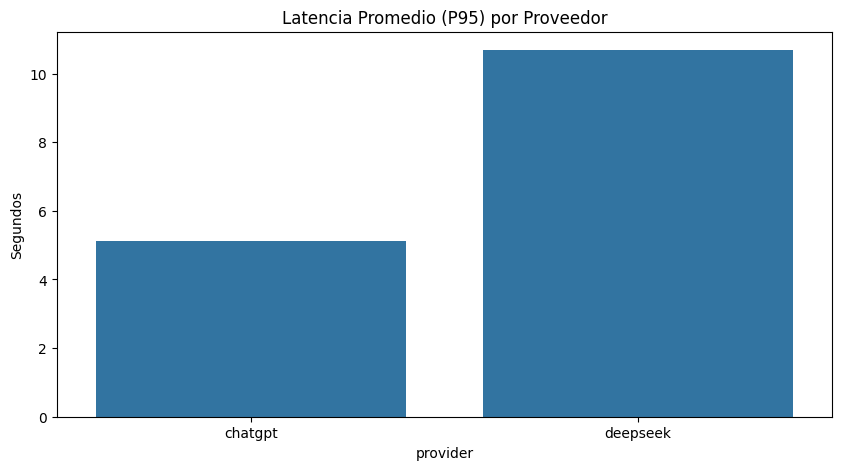

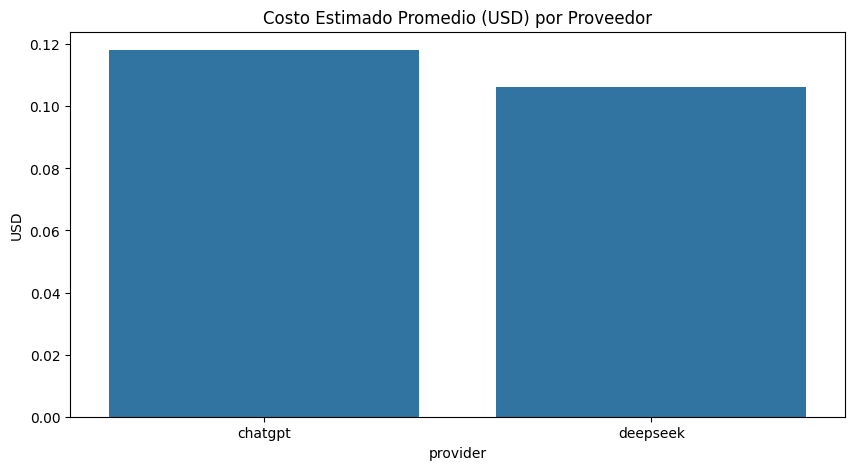

In [87]:
metrics_reset = metrics.reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='provider', y='average_latency_avg_sec', data=metrics_reset)
plt.title('Latencia Promedio (Promedio) por Proveedor')
plt.ylabel('Segundos')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='provider', y='average_latency_p95_sec', data=metrics_reset)
plt.title('Latencia Promedio (P95) por Proveedor')
plt.ylabel('Segundos')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='provider', y='average_estimated_cost_usd', data=metrics_reset)
plt.title('Costo Estimado Promedio (USD) por Proveedor')
plt.ylabel('USD')
plt.show()

## Resumen:

### Hallazgos Clave del Análisis de Datos

Según el análisis de los datos de `metrics`:

* **Latencia Promedio:** DeepSeek generalmente tiene una latencia promedio más alta (tanto promedio como P95) en comparación con ChatGPT.
* **Costo Estimado Promedio:** DeepSeek tiene un costo estimado promedio por consulta más bajo en comparación con ChatGPT.

### Compensaciones

El análisis sugiere las siguientes compensaciones entre ChatGPT y DeepSeek basándose en este conjunto de datos específico:

* **Velocidad vs. Costo:** ChatGPT es más rápido (menor latencia) pero más caro, mientras que DeepSeek es más lento pero más barato.

### Próximos Pasos

* Para realizar una comparación de rendimiento más completa, se necesitan datos o anotaciones adicionales para incluir métricas como la relevancia, la utilidad o la corrección factual de las respuestas generadas, ya que el conjunto de datos actual se centra principalmente en la latencia y el costo.


**Razonamiento**:
Basado en las columnas disponibles ('question', 'provider', 'answer', 'references'), la longitud de la 'answer' y la presencia de 'references' pueden ser usadas como posibles indicadores de rendimiento. Calcular estas métricas agrupadas por 'provider'.